In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.special import erfc

In [3]:
def dsig(eta, tau, t):
    b = 1./(1.-eta)/np.sqrt(tau)
    a = eta*b
    return a*(1./np.sqrt(np.pi*t) - b*np.exp(b**2*t)*erfc(b*np.sqrt(t)))

In [4]:
def dsigapprox(eta, tau, t,c=0.5):    
    m = eta/(np.sqrt(np.pi*tau)*(1.-eta)) 
    d = eta/(tau*(1.-eta)**2)
    return m*t**(c-1.) + d

In [5]:
def dsigapprox1(eta, tau, t,c=0.5):    
    m = eta/(np.sqrt(np.pi*tau)*(1.-eta)) 
    d = eta**2/(tau*(1.-eta)**2)
    return m*t**(c-1.) + d

In [9]:
# b = 1./(1.-eta)/np.sqrt(tau)
# a = eta*b

# m = 1./np.sqrt(np.pi)*a
# d = a**2


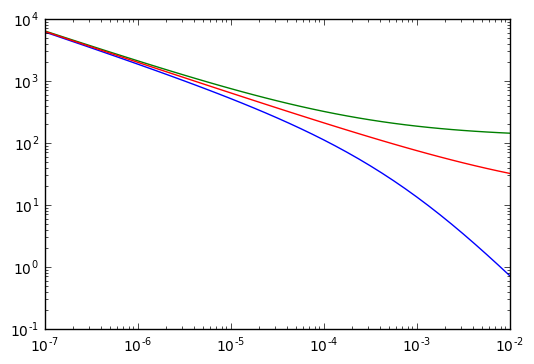

In [10]:
t = np.logspace(-7, -2, 41)
plt.loglog(t, dsig(0.1, 0.001, t))
plt.loglog(t, dsigapprox(0.1, 0.001, t))
plt.loglog(t, dsigapprox1(0.1, 0.001, t))


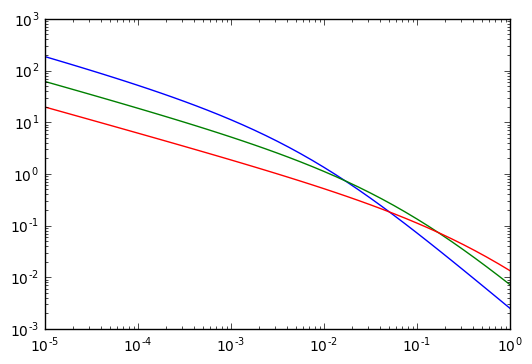

In [11]:
t = np.logspace(-5, 0., 41)
plt.loglog(t, dsig(0.1, 0.01, t))
plt.loglog(t, dsig(0.1, 0.1, t))
plt.loglog(t, dsig(0.1, 1, t))

In [12]:
# def petaconvfun(a, b, we, time, P):
def petaconvfun(m, time=t):
    a, b = m[0], m[1]    
    kernel = lambda t: a*(1./np.sqrt(np.pi*t) - b*np.exp(b**2*t)*erfc(b*np.sqrt(t)))
    temp = kernel(time)
#     temp = Convolution.CausalConvIntSingle(we, time, kernel)
#     out = P*temp
    out = temp.copy()
    return out

# def petaJconvfun(a, b, we, time, P):
def petaJconvfun(m, time=t):    
    a, b = m[0], m[1]
    kernela = lambda x: 1./np.sqrt(np.pi*t) - b*np.exp(b**2*t)*erfc(b*np.sqrt(t))
    kernelb = lambda x: a*(2*b*np.sqrt(t)/np.sqrt(np.pi) \
                        - 2*b**2*t*np.exp(b**2*t)*erfc(b*np.sqrt(t))\
                        - np.exp(b**2*t)*erfc(b*np.sqrt(t)))
    tempa = kernela(time)
    tempb = kernelb(time)
#     tempa = Convolution.CausalConvIntSingle(we, time, kernela)
#     tempb = Convolution.CausalConvIntSingle(we, time, kernelb)
#     J = np.c_[P*tempeta, P*temptau]
    J = np.c_[tempa, tempb]
    return J

In [13]:
from SimPEG import Tests

In [14]:
eta, tau = 0.1, 0.1
b = 1./(1.-eta)/np.sqrt(tau)
a = eta*b

m0 = np.r_[a, b]
J = petaJconvfun(m0)
dobs = petaconvfun(m0)

In [15]:
def Jvec(m, mx):
    J = petaJconvfun(m)
    return np.dot(J, mx)


In [16]:
derChk = lambda m: [petaconvfun(m), lambda mx: Jvec(m0, mx)]
passed = Tests.checkDerivative(derChk, m0, plotIt=False)

==================== checkDerivative ====================
iter    h         |ft-f0|   |ft-f0-h*J0*dx|  Order
---------------------------------------------------------
 0   1.00e-01    2.616e+01     2.902e-02      nan
 1   1.00e-02    2.618e+00     2.908e-04      1.999
 2   1.00e-03    2.618e-01     2.908e-06      2.000
 3   1.00e-04    2.618e-02     2.908e-08      2.000
 4   1.00e-05    2.618e-03     2.909e-10      2.000
 5   1.00e-06    2.618e-04     2.908e-12      2.000
 6   1.00e-07    2.618e-05     2.856e-14      2.008
========================= PASS! =========================
You are awesome.

